In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
inf = pd.read_csv('Book1A.csv')

In [ ]:
inf.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.30,15,78,22,10.48,0,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.92,15,74,20,11.70,0,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.27,11,72,18,11.80,0,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.67,13,72,20,12.00,0,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.06,11,72,18,10.00,0,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Changing the title of the properties.

data = inf.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
data.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.30,15,78,22,10.48,0,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.92,15,74,20,11.70,0,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.27,11,72,18,11.80,0,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.67,13,72,20,12.00,0,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.06,11,72,18,10.00,0,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Dropping unnecessary features.

data.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Target                 int64  
 1   Age (yrs)              int64  
 2   Weight (Kg)            float64
 3   Height(Cm)             float64
 4   BMI                    float64
 5   Blood Group            int64  
 6   Pulse rate(bpm)        int64  
 7   RR (breaths/min)       int64  
 8   Hb(g/dl)               float64
 9   Cycle(R/I)             int64  
 10  Cycle length(days)     int64  
 11  Marraige Status (Yrs)  float64
 12  Pregnant(Y/N)          int64  
 13  No. of aborptions      int64  
 14  I beta-HCG(mIU/mL)     float64
 15  II beta-HCG(mIU/mL)    float64
 16  FSH(mIU/mL)            float64
 17  LH(mIU/mL)             float64
 18  FSH/LH                 float64
 19  Hip(inch)              int64  
 20  Waist(inch)            int64  
 21  Waist:Hip Ratio        float64
 22  TSH (mIU/L)            flo

In [ ]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: float64

In [ ]:
# Similarly,

data["I beta-HCG(mIU/mL)"].head()

0      1.99
1     60.80
2    494.08
3      1.99
4    801.45
Name: I beta-HCG(mIU/mL), dtype: float64

In [ ]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')



In [ ]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)


data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
data.columns = [col.strip() for col in data.columns]

In [ ]:
colors = ['#670067','#008080']

In [ ]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count

    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

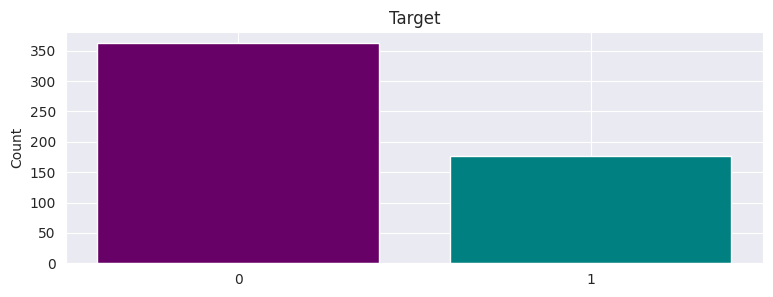

Target: 
 0    362
1    176
Name: Target, dtype: int64


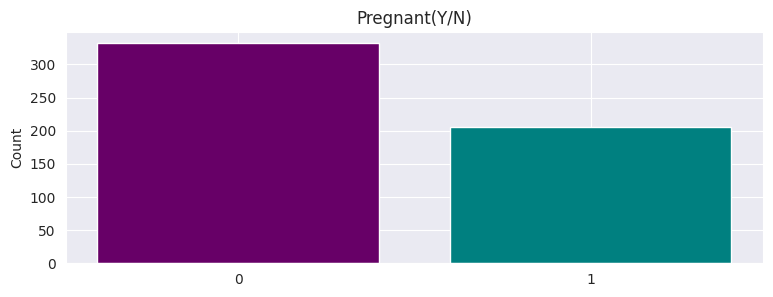

Pregnant(Y/N): 
 0    332
1    206
Name: Pregnant(Y/N), dtype: int64


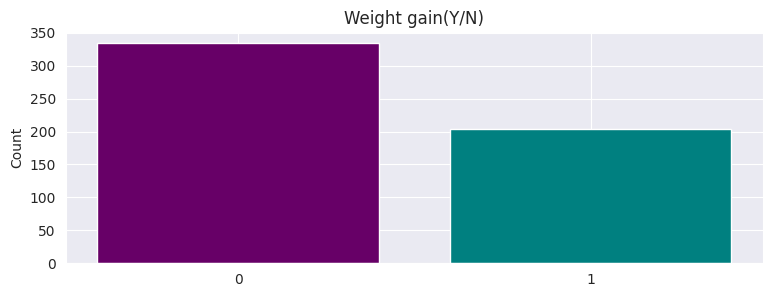

Weight gain(Y/N): 
 0    334
1    204
Name: Weight gain(Y/N), dtype: int64


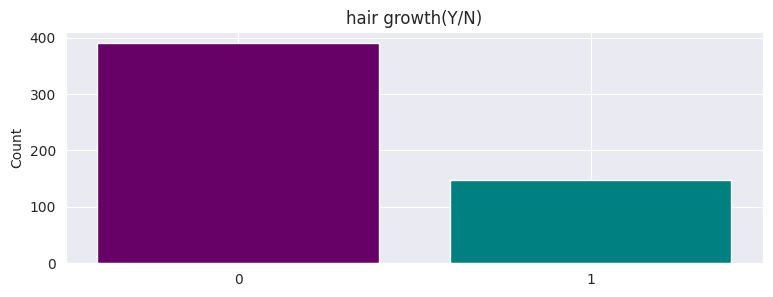

hair growth(Y/N): 
 0    390
1    148
Name: hair growth(Y/N), dtype: int64


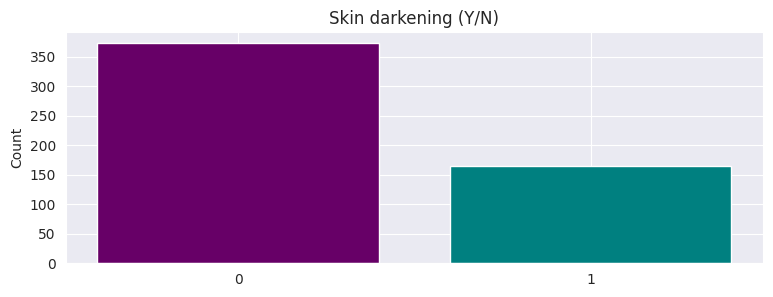

Skin darkening (Y/N): 
 0    373
1    165
Name: Skin darkening (Y/N), dtype: int64


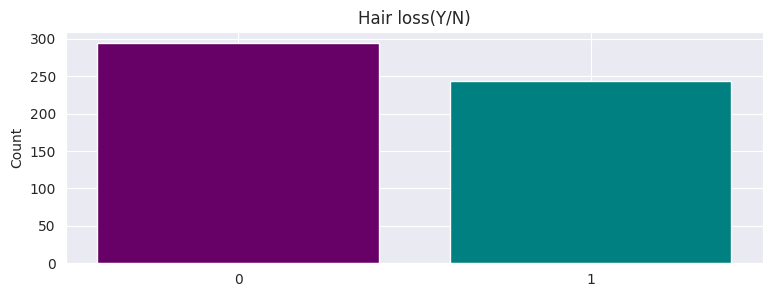

Hair loss(Y/N): 
 0    294
1    244
Name: Hair loss(Y/N), dtype: int64


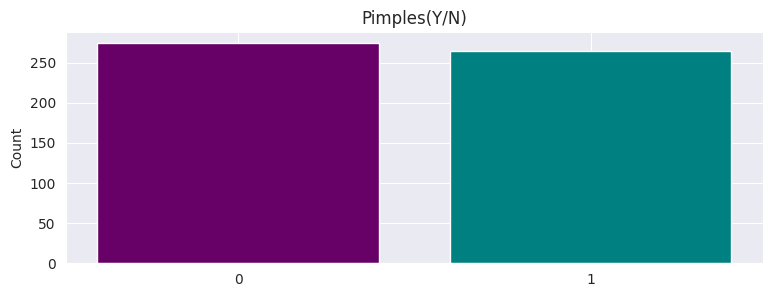

Pimples(Y/N): 
 0    274
1    264
Name: Pimples(Y/N), dtype: int64


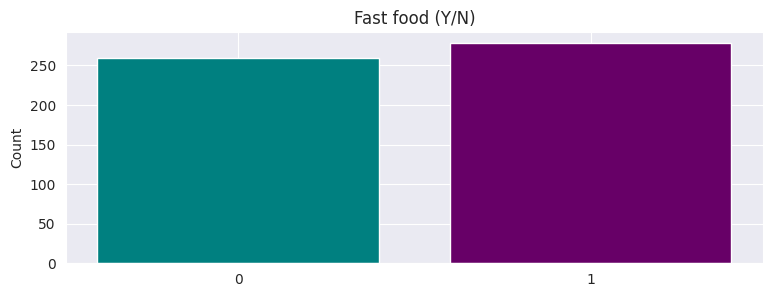

Fast food (Y/N): 
 1    278
0    260
Name: Fast food (Y/N), dtype: int64


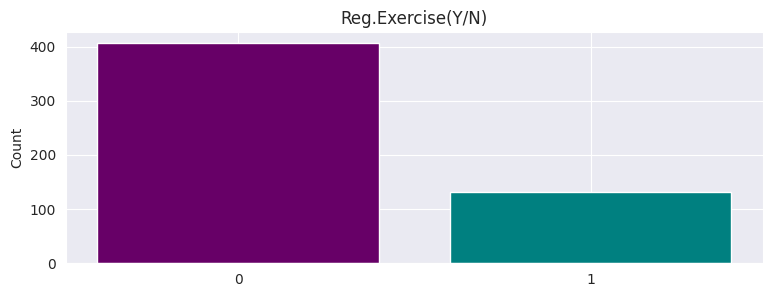

Reg.Exercise(Y/N): 
 0    406
1    132
Name: Reg.Exercise(Y/N), dtype: int64


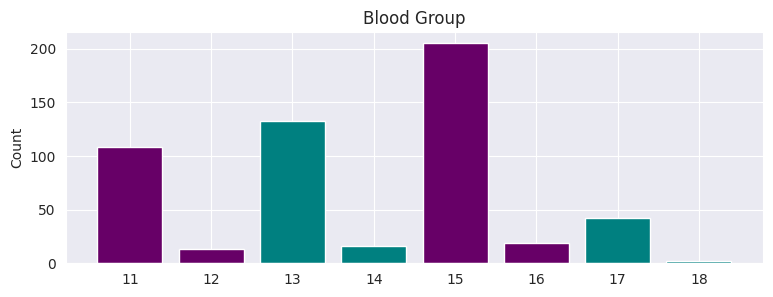

Blood Group: 
 15    205
13    133
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

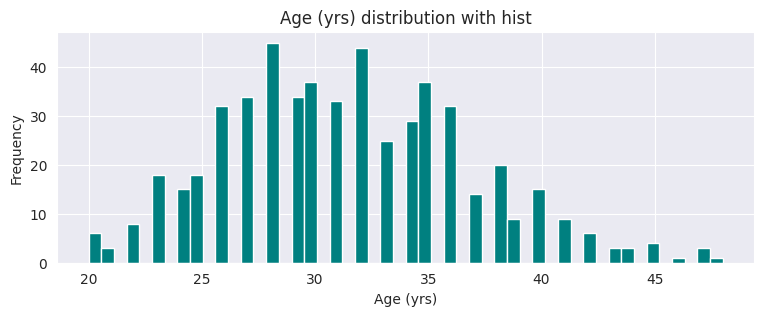

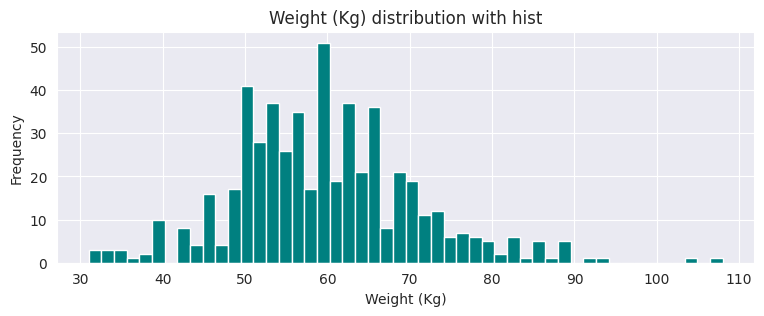

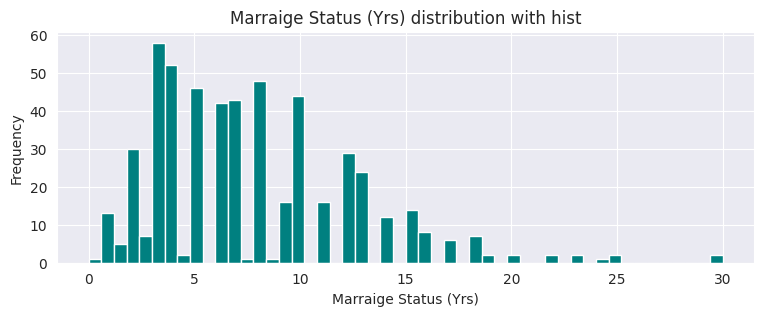

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

In [ ]:
# Having a look at some basic statistical details.

data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.327138,31.420074,59.644052,156.480104,24.323625,13.802974,73.250929,19.236059,11.160558,0.276952,...,0.490706,0.516729,0.245353,114.832714,77.081784,6.120818,6.646840,15.014498,15.448643,8.477454
std,0.469605,5.413801,11.051033,6.042238,4.059978,1.844573,4.441870,1.688509,0.868516,0.447909,...,0.500379,0.500185,0.430697,5.922363,4.711095,4.226181,4.448108,3.567421,3.322812,2.165036
min,0.000000,20.000000,31.000000,137.000000,12.420000,11.000000,13.000000,16.000000,8.500000,0.000000,...,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.740000,13.000000,72.000000,18.000000,10.500000,0.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.300000,156.000000,24.235000,14.000000,72.000000,18.000000,11.000000,0.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.662500,15.000000,74.000000,20.000000,11.775000,1.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,1.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


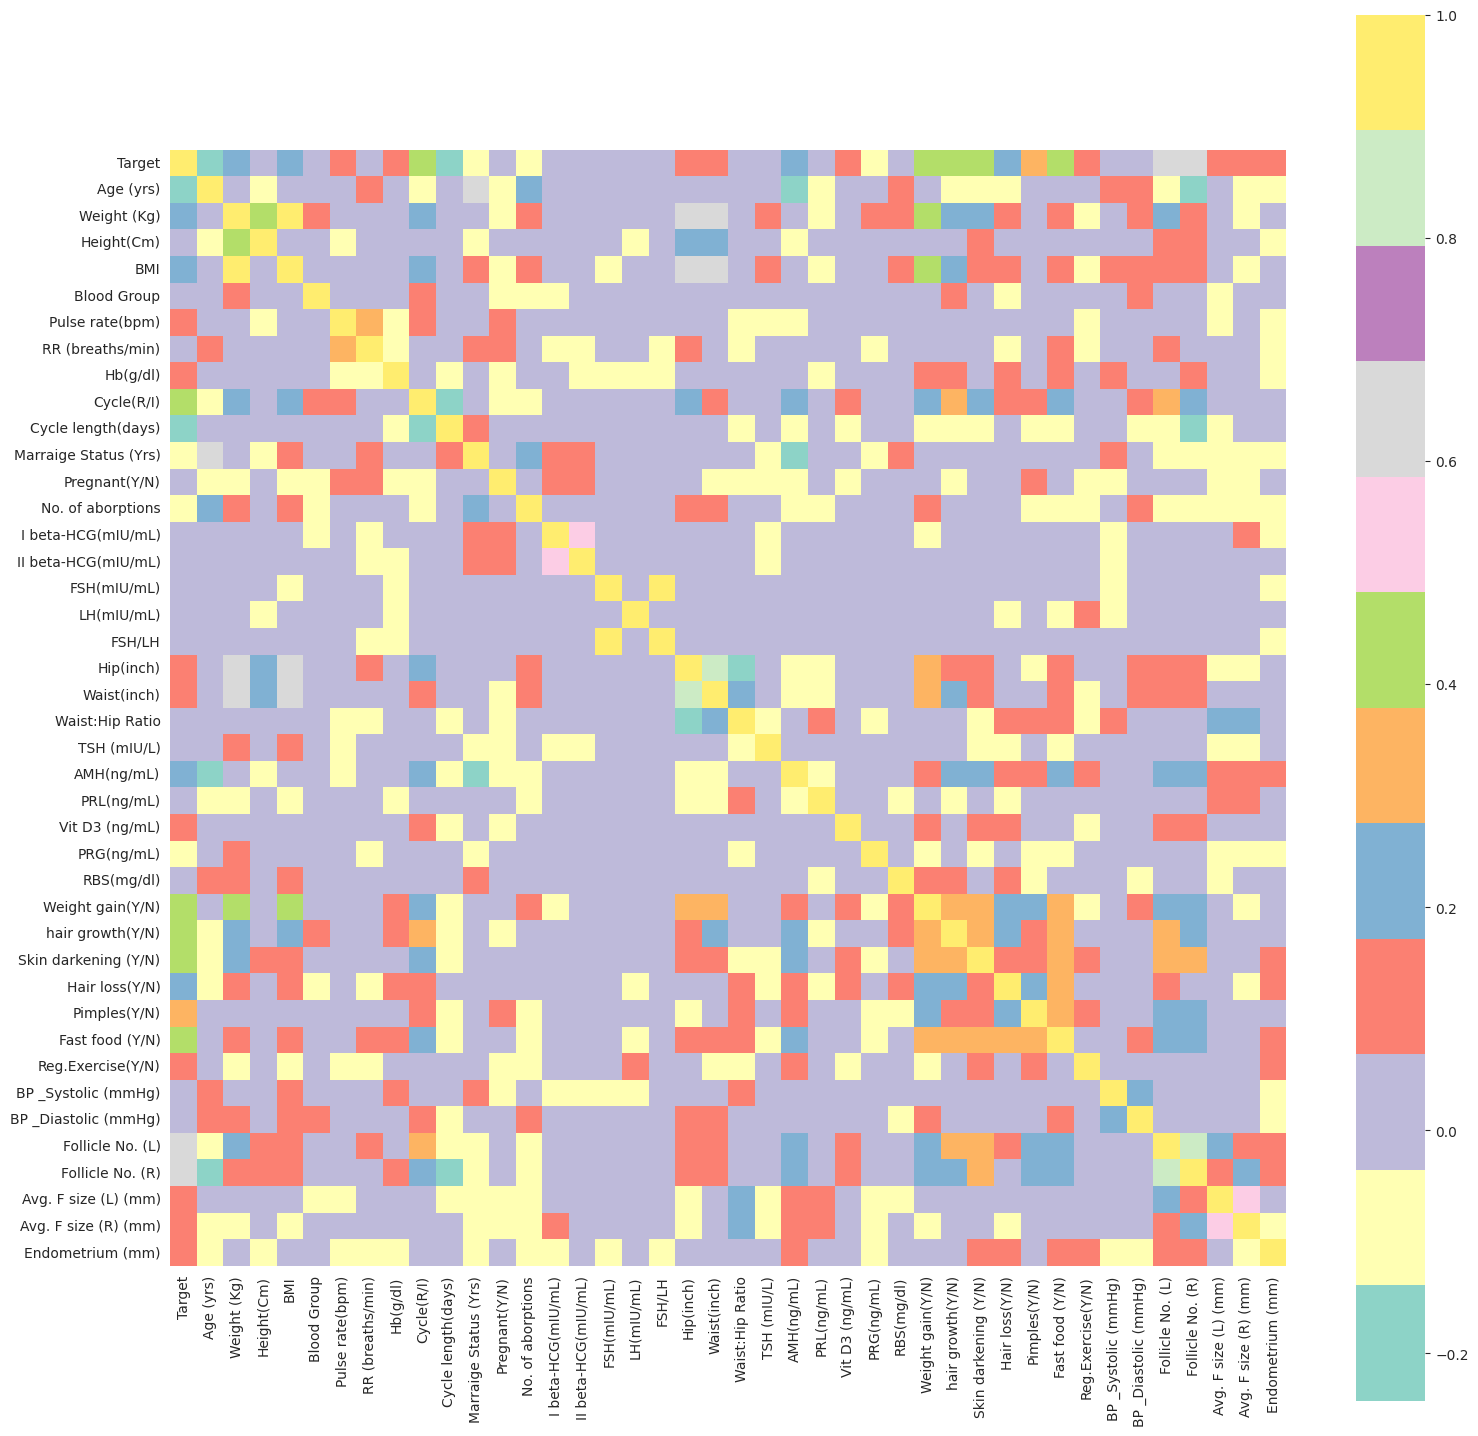

In [ ]:
c# Examaning a correlation matrix of all the features.

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

In [ ]:
# How all the features correlate with the PCOS.

corrmat['Target'].sort_values(ascending=False)

Target                   1.000000
Follicle No. (R)         0.650929
Follicle No. (L)         0.601208
Skin darkening (Y/N)     0.481323
hair growth(Y/N)         0.466508
Weight gain(Y/N)         0.443093
Cycle(R/I)               0.400668
Fast food (Y/N)          0.380985
Pimples(Y/N)             0.290335
AMH(ng/mL)               0.263974
Weight (Kg)              0.209969
BMI                      0.199302
Hair loss(Y/N)           0.176496
Waist(inch)              0.161922
Hip(inch)                0.160882
Avg. F size (L) (mm)     0.129997
Endometrium (mm)         0.107639
Avg. F size (R) (mm)     0.094528
Pulse rate(bpm)          0.092699
Hb(g/dl)                 0.087809
Vit D3 (ng/mL)           0.085825
Reg.Exercise(Y/N)        0.071979
Height(Cm)               0.065465
LH(mIU/mL)               0.064074
RBS(mg/dl)               0.049452
RR (breaths/min)         0.038641
Blood Group              0.033701
BP _Diastolic (mmHg)     0.019870
II beta-HCG(mIU/mL)      0.012808
Waist:Hip Rati

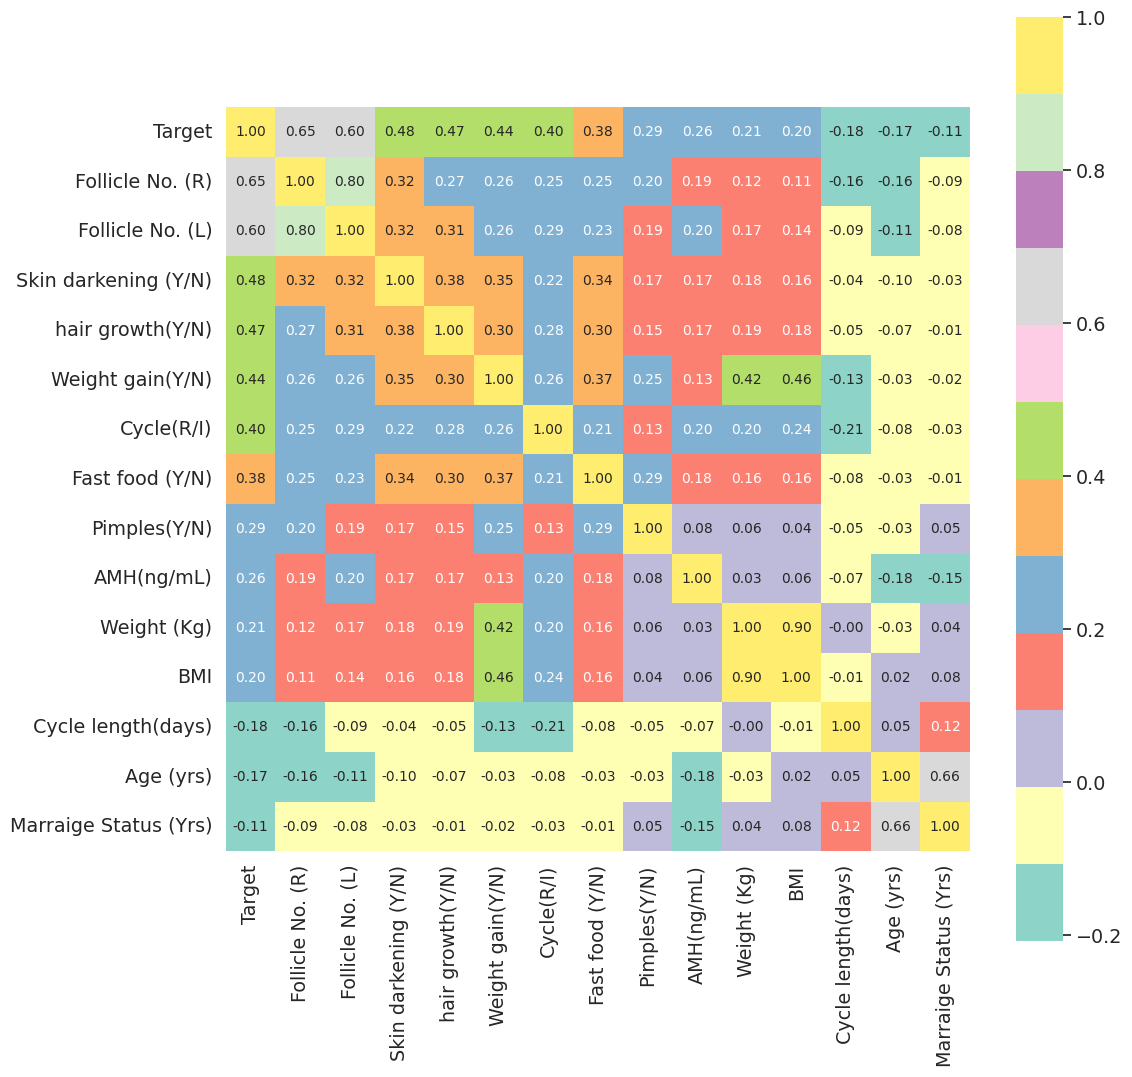

In [ ]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

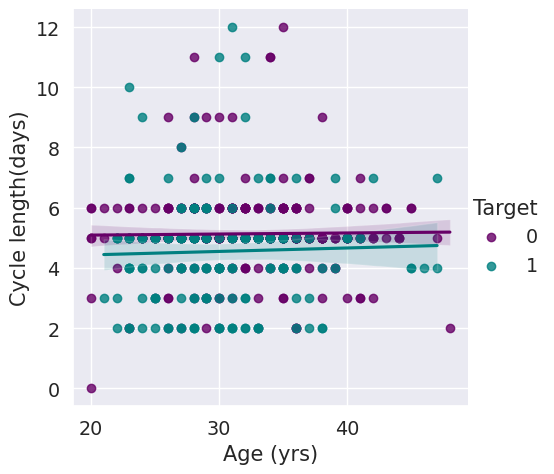

In [ ]:
# Length of menstrual phase in PCOS vs normal

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)

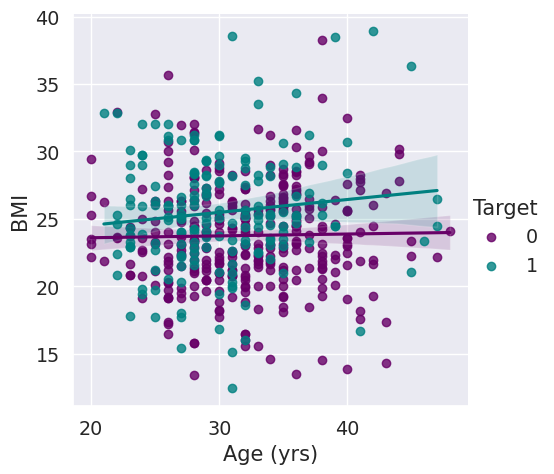

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

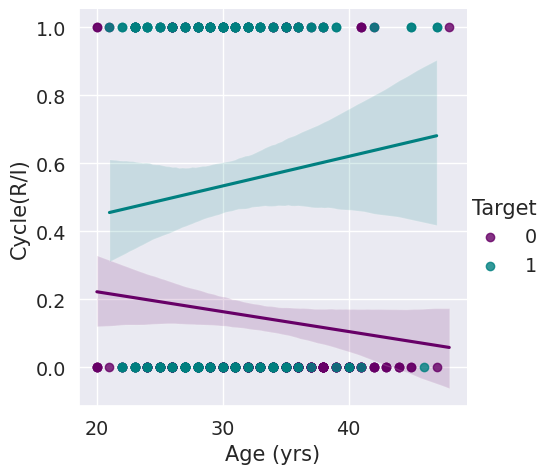

In [ ]:
# Cycle IR wrt age

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

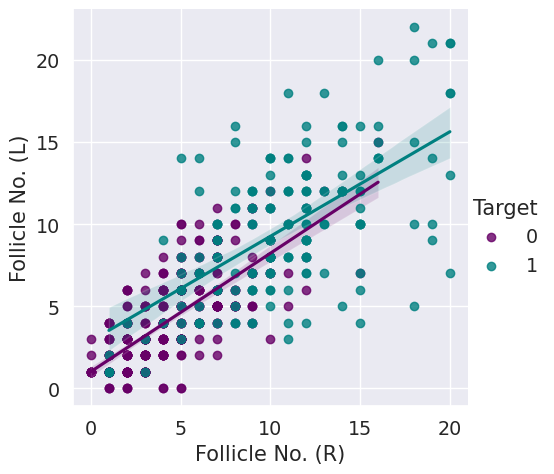

In [ ]:
# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

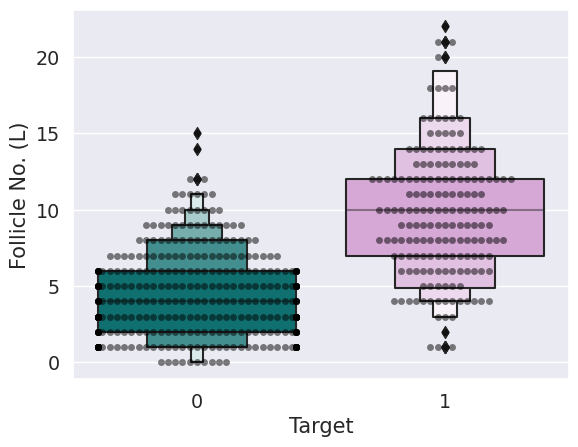

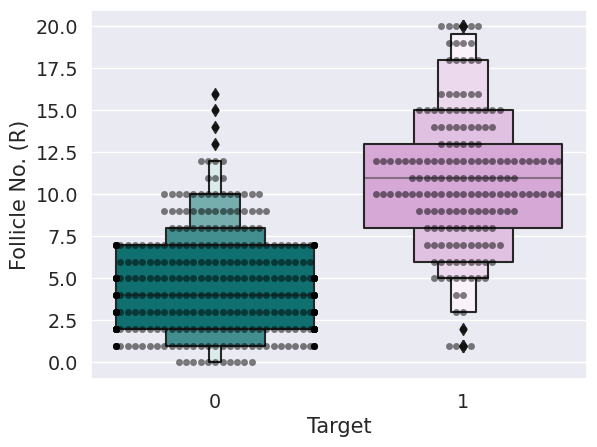

In [ ]:
# Exploring the above observation with the help of Boxplot

color = ["teal", "plum"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()


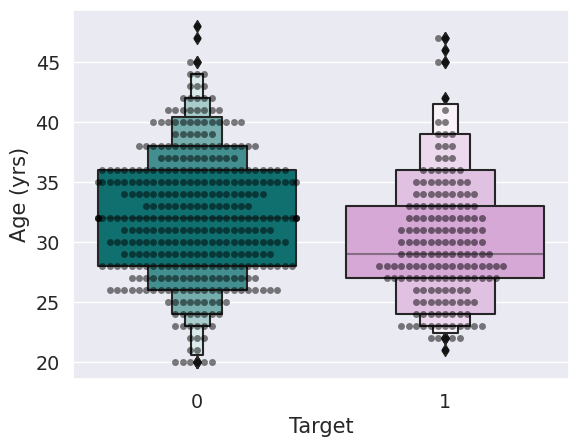

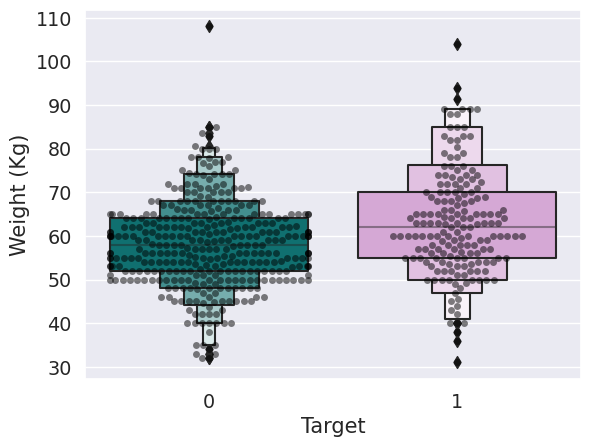

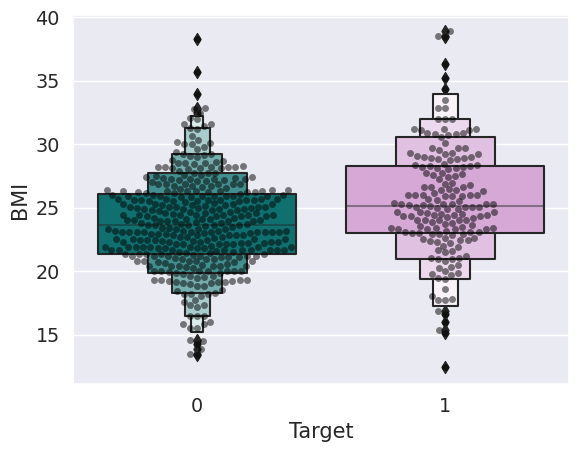

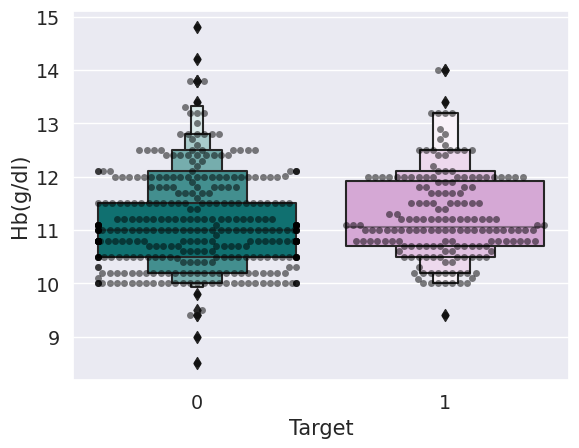

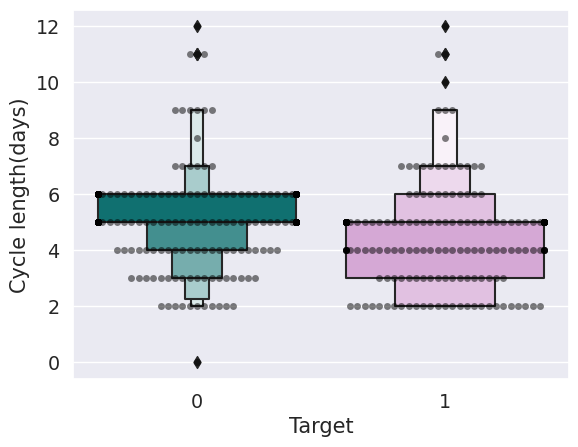

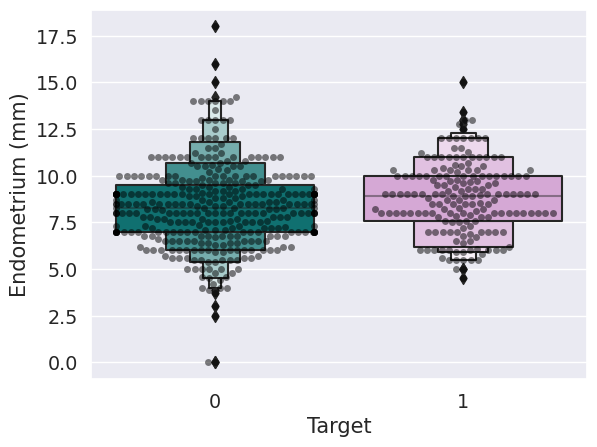

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

In [ ]:
#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 376
X_test 162
y_train 376
y_test 162


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 85.37
Testing Accuracy: % 84.57


In [ ]:
random_state = 42
classifier = [
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             ]



# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}




classifier_param = [svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 28 candidates, totalling 280 fits
72.62
Fitting 10 folds for each of 48 candidates, totalling 480 fits
91.22
Fitting 10 folds for each of 14 candidates, totalling 140 fits
84.31


In [ ]:
best_estimators

[SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=300,
                        random_state=42),
 LogisticRegression(C=1000.0, random_state=42)]

In [ ]:
svm = best_estimators[0]
rf = best_estimators[1]
lr = best_estimators[2]

In [ ]:
model_list = ['SVC','RandomForest','Logistic Regression']

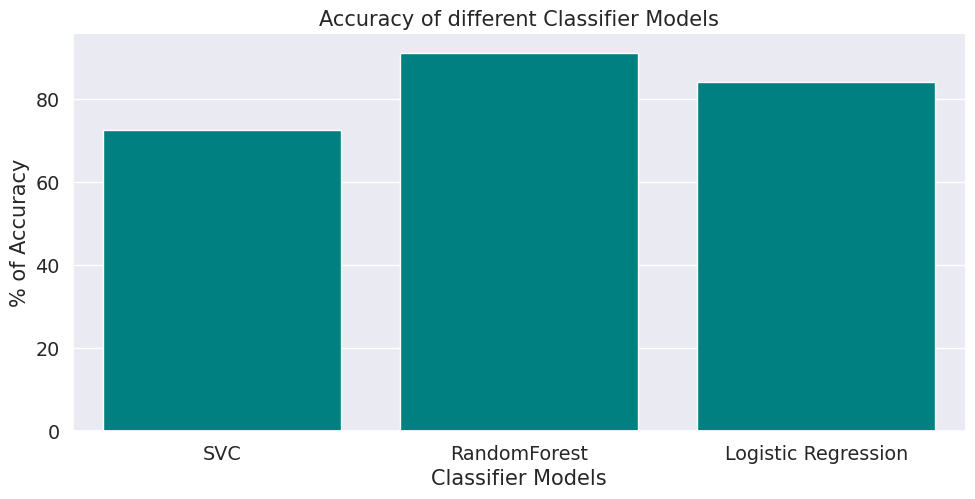

In [ ]:
fg = sns.catplot(x = model_list, y = cv_result, aspect=2 ,color= colors[1], saturation=5,kind='bar', data=data)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')
plt.show()

In [ ]:
# Plotly Bar Chart:

import plotly.graph_objects as go
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(32, 55, 110)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
model = [svm,rf,lr]
predictions = []

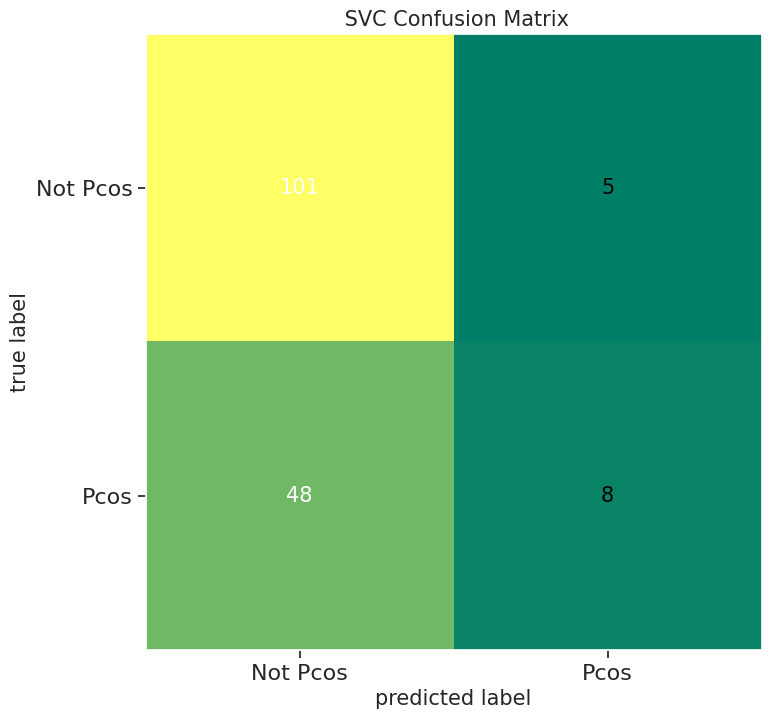

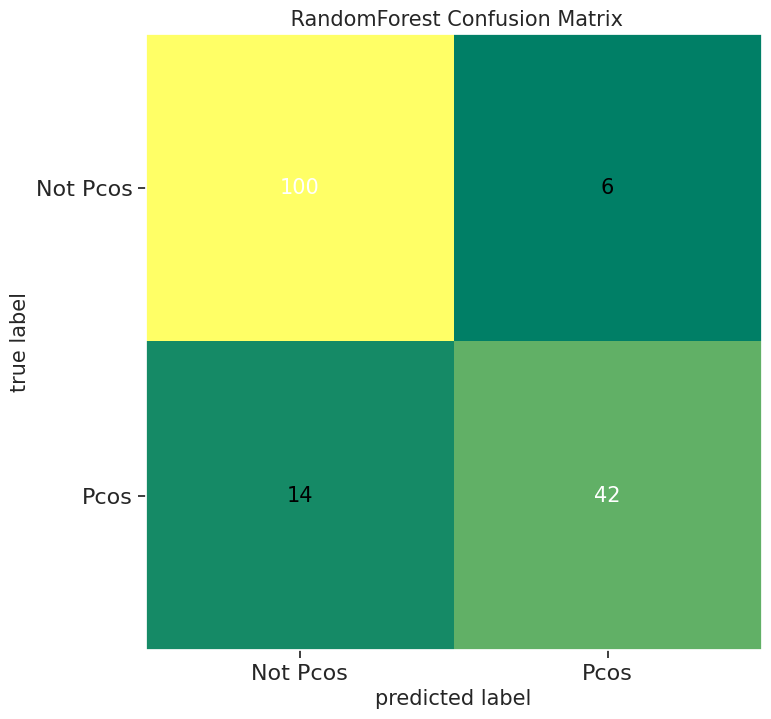

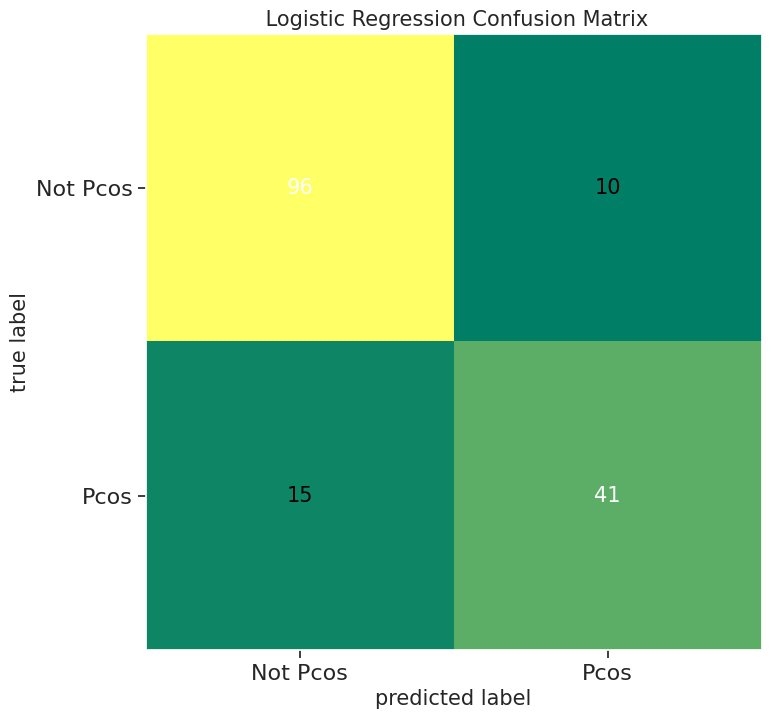

In [ ]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(3):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.summer)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()